In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
pd.set_option('display.max_columns', 50)
fname = "Student Alcohol Consumption.csv"
df = pd.read_csv(fname)
columnsA = df.columns
columnsB = ["學校", "性別", "年齡", "居住區（都市或郊區）", "家庭規模", "父母同居狀況（同居或分居）", "母親教育程度", "父親教育程度", "母親工作", "父親工作", "原因", "監護人", "家庭到學校的路程", "每週學習時間", "過去不及格次數", "課外輔導", "家庭協助教育", "付費課程", "課外活動", "是否有讀幼兒園", "是否接受高等教育", "是否在家上網", "情侶關係", "家庭關係", "放學休閒時間", "與朋友外出的經常性", "工作日飲酒量", "周末飲酒量", "健康狀態", "出席情況", "第一階段成績", "第二階段成績", "最終成績"]
columnsC = ["'GP'  or  'MS'", "'F' or 'M'", "from 15 to 22", "'U' or 'R'", "'LE3' or 'GT3'", "'T' or 'A'", "from 0 to 4", "from 0 to 4", "'teacher', 'health', 'services', 'at_home' or 'other'", "'teacher', 'health', 'services', 'at_home' or 'other'", "'home', 'reputation', 'course' or 'other'", "'mother', 'father' or 'other'", "from 1 to 4", "from 1 to 4", "If 1<=n<3 , n, else 4", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "'yes' or 'no'", "from 1 to 5", "from 1 to 5", "from 1 to 5", "from 1 to 5", "from 1 to 5", "from 1 to 5", "from 0 to 93", "from 0 to 20", "from 0 to 20", "from 0 to 20"]
df_introduce = pd.DataFrame(columns=columnsB)
df_introduce.loc[0] = columnsA
df_introduce.loc[1] = columnsC
df_introduce

,學校,性別,年齡,居住區（都市或郊區）,家庭規模,父母同居狀況（同居或分居）,母親教育程度,父親教育程度,母親工作,父親工作,原因,監護人,家庭到學校的路程,每週學習時間,過去不及格次數,課外輔導,家庭協助教育,付費課程,課外活動,是否有讀幼兒園,是否接受高等教育,是否在家上網,情侶關係,家庭關係,放學休閒時間,與朋友外出的經常性,工作日飲酒量,周末飲酒量,健康狀態,出席情況,第一階段成績,第二階段成績,最終成績
0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,'GP' or 'MS','F' or 'M',from 15 to 22,'U' or 'R','LE3' or 'GT3','T' or 'A',from 0 to 4,from 0 to 4,"'teacher', 'health', 'services', 'at_home' or ...","'teacher', 'health', 'services', 'at_home' or ...","'home', 'reputation', 'course' or 'other'","'mother', 'father' or 'other'",from 1 to 4,from 1 to 4,"If 1<=n<3 , n, else 4",'yes' or 'no','yes' or 'no','yes' or 'no','yes' or 'no','yes' or 'no','yes' or 'no','yes' or 'no','yes' or 'no',from 1 to 5,from 1 to 5,from 1 to 5,from 1 to 5,from 1 to 5,from 1 to 5,from 0 to 93,from 0 to 20,from 0 to 20,from 0 to 20


          Alc        G1        G2        G3
Alc  1.000000 -0.190931 -0.194222 -0.208881
G1  -0.190931  1.000000  0.864982  0.826387
G2  -0.194222  0.864982  1.000000  0.918548
G3  -0.208881  0.826387  0.918548  1.000000


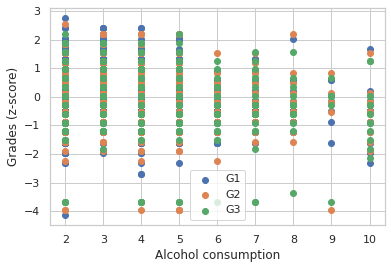

In [112]:
df["Alc"] = df["Dalc"] + df["Walc"]
df["G1"] = df["G1"].apply(lambda x: (x - df["G1"].mean()) / df["G1"].std())
df["G2"] = df["G2"].apply(lambda x: (x - df["G2"].mean()) / df["G2"].std())
df["G3"] = df["G3"].apply(lambda x: (x - df["G3"].mean()) / df["G3"].std())
print(df[["Alc", "G1", "G2", "G3"]].corr())
plt.scatter(df["Alc"], df["G1"], label="G1")
plt.scatter(df["Alc"], df["G2"], label="G2")
plt.scatter(df["Alc"], df["G3"], label="G3")
plt.xlabel("Alcohol consumption")
plt.ylabel("Grades (z-score)")
plt.legend()
plt.show()

activities   no  yes
romantic            
no          220  190
yes         114  125


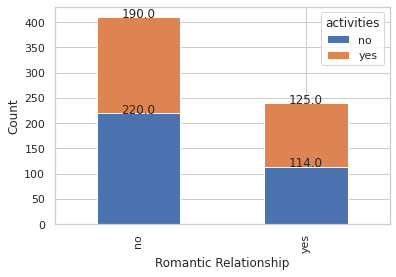

In [207]:
#romantic - with a romantic relationship (binary: yes or no)
#activities - extra-curricular activities (binary: yes or no)

# 交叉比對
cross_tab = pd.crosstab(df["romantic"], df["activities"])
print(cross_tab)

# 製作堆疊長條圖
bar = cross_tab.plot(kind='bar', stacked=True)

# 製作數值添加在長條圖
for a in bar.patches:
    width, height = a.get_width(), a.get_height()
    #這是得到每個圖表左上角的座標位置
    x, y = a.get_xy()
    #annotate用於在圖表上添加文本標籤
    bar.annotate(height, (x + width/2, y + height), ha='center')

# 設定 x 和 y 軸標籤
plt.xlabel('Romantic Relationship')
plt.ylabel('Count')
plt.show()

有戀愛關係也有課外活動的平均酒精消費量： 4.032 
 有戀愛關係但沒有課外活動的平均酒精消費量： 3.596 
 沒有戀愛關係但有課外活動的平均酒精消費量： 3.726 
 沒有戀愛關係也沒有課外活動的平均酒精消費量： 3.786


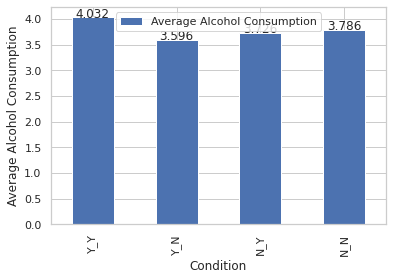

In [208]:
romantic_and_activities = df[(df["romantic"] == "yes") & (df["activities"] == "yes")]
romantic_and_no_activities = df[(df["romantic"] == "yes") & (df["activities"] == "no")]
no_romantic_and_activities = df[(df["romantic"] == "no") & (df["activities"] == "yes")]
no_romantic_and_no_activities = df[(df["romantic"] == "no") & (df["activities"] == "no")]

mean_romantic_and_activities = romantic_and_activities["Alc"].mean().round(3)
mean_romantic_and_no_activities = romantic_and_no_activities["Alc"].mean().round(3)
mean_no_romantic_and_activities = no_romantic_and_activities["Alc"].mean().round(3)
mean_no_romantic_and_no_activities = no_romantic_and_no_activities["Alc"].mean().round(3)

# 創建比較表
compare_tab = pd.DataFrame({
    "Condition": ["With Romantic Relationship and Extracurricular Activities", "With Romantic Relationship but No Extracurricular Activities", "No Romantic Relationship but With Extracurricular Activities", "No Romantic Relationship and No Extracurricular Activities"],
    "Average Alcohol Consumption": [mean_romantic_and_activities, mean_romantic_and_no_activities, mean_no_romantic_and_activities, mean_no_romantic_and_no_activities]
})
# Create the bar plot

print("有戀愛關係也有課外活動的平均酒精消費量：",mean_romantic_and_activities,"\n",
      "有戀愛關係但沒有課外活動的平均酒精消費量：",mean_romantic_and_no_activities,"\n",
      "沒有戀愛關係但有課外活動的平均酒精消費量：",mean_no_romantic_and_activities,"\n",
      "沒有戀愛關係也沒有課外活動的平均酒精消費量：",mean_no_romantic_and_no_activities)

bar2 = compare_tab.plot(kind='bar')

for a in bar2.patches:
    width, height = a.get_width(), a.get_height()
    x, y = a.get_xy()
    plt.text(x + width/2, y + height, height , ha='center')

plt.xlabel('Condition')
plt.ylabel('Average Alcohol Consumption')
plt.xticks(range(4), ["Y_Y", "Y_N", "N_Y", "N_N"])
plt.legend()
plt.show()

paid        no  yes
schoolsup          
no         548   33
yes         62    6


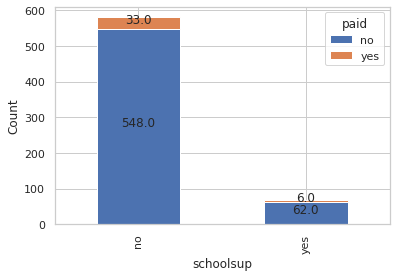

In [209]:
#schoolsup - extra educational support (binary: yes or no)
#paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

# 交叉比對
cross_tab = pd.crosstab(df["schoolsup"], df["paid"])
print(cross_tab)

# 製作堆疊長條圖
bar = cross_tab.plot(kind='bar', stacked=True)

# 製作數值添加在長條圖
for a in bar.patches:
    width, height = a.get_width(), a.get_height()
    #這是得到每個圖表左上角的座標位置
    x, y = a.get_xy()
    #annotate用於在圖表上添加文本標籤
    bar.annotate(height, (x + width/2, y + height*0.5), ha='center')
# 設定 x 和 y 軸標籤
plt.xlabel('schoolsup')
plt.ylabel('Count')
plt.show()

有額外的教育支持同時也有額外付費課程的平均酒精消費量： 2.0 
 有額外的教育支持但沒有額外付費課程的平均酒精消費量： 3.468 
 沒有額外的教育支持但有額外付費課程的平均酒精消費量： 4.545 
 沒有額外的教育支持也沒有額外付費課程的平均酒精消費量： 3.792


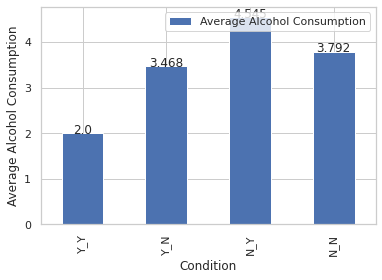

In [210]:
schoolsup_and_paid = df[(df["schoolsup"] == "yes") & (df["paid"] == "yes")]
schoolsup_and_no_paid = df[(df["schoolsup"] == "yes") & (df["paid"] == "no")]
no_schoolsup_and_paid = df[(df["schoolsup"] == "no") & (df["paid"] == "yes")]
no_schoolsup_and_no_paid = df[(df["schoolsup"] == "no") & (df["paid"] == "no")]

mean_schoolsup_and_paid = schoolsup_and_paid["Alc"].mean().round(3)
mean_schoolsup_and_no_paid = schoolsup_and_no_paid["Alc"].mean().round(3)
mean_no_schoolsup_and_paid = no_schoolsup_and_paid["Alc"].mean().round(3)
mean_no_schoolsup_and_no_paid = no_schoolsup_and_no_paid["Alc"].mean().round(3)

print("有額外的教育支持同時也有額外付費課程的平均酒精消費量：",mean_schoolsup_and_paid,"\n",
      "有額外的教育支持但沒有額外付費課程的平均酒精消費量：",mean_schoolsup_and_no_paid,"\n",
      "沒有額外的教育支持但有額外付費課程的平均酒精消費量：",mean_no_schoolsup_and_paid,"\n",
      "沒有額外的教育支持也沒有額外付費課程的平均酒精消費量：",mean_no_schoolsup_and_no_paid)

# 創建比較表
compare_tab = pd.DataFrame({
    "Condition": ["With schoolsup and paid", "With schoolsup but No Extracurricular Activities", "No schoolsup but With Extracurricular Activities", "No schoolsup and No Paid"],
    "Average Alcohol Consumption": [mean_schoolsup_and_paid, mean_schoolsup_and_no_paid, mean_no_schoolsup_and_paid, mean_no_schoolsup_and_no_paid]
})

bar2 = compare_tab.plot(kind='bar')

for a in bar2.patches:
    width, height = a.get_width(), a.get_height()
    x, y = a.get_xy()
    plt.text(x + width/2, y + height, height , ha='center')

plt.xlabel('Condition')
plt.ylabel('Average Alcohol Consumption')
plt.xticks(range(4), ["Y_Y", "Y_N", "N_Y", "N_N"])
plt.legend()
plt.show()